Barbara M Smith, Karen E Petrie, and Ian P Gent
Models and symmetry breaking for ‘peaceable armies of queens’
Integration of AI and OR Techniques in Constraint Programming for Combinatorial Optimization Problems, 271–286, 2004

In [7]:
from pyomo.environ import *
import matplotlib.pyplot as plt
import random

In [2]:
model = AbstractModel()
model.N = Param(mutable=True, default=8)
model.i = RangeSet(1, model.N)
model.j = Set(initialize=model.i)
model.U = Var(model.i,model.j, within=Binary, initialize=0)
model.B = Var(model.i,model.j, within=Binary, initialize=0)

def C1_rule(model,i,j):
    return sum(model.B[r,c] for r in model.i for c in model.j if (i==r or j==c or i-r==j-c or i-r==-(j-c))) <=10*(1-model.U[i,j])
model.C1 = Constraint(model.i, model.j, rule=C1_rule)

def C2_rule(model,i,j):
    return sum(model.U[r,c] for r in model.i for c in model.j if (i==r or j==c or i-r==j-c or i-r==-(j-c))) <=10*(1-model.B[i,j])
model.C2 = Constraint(model.i, model.j, rule=C2_rule)



def ruleeq(model):
    return sum(model.U[i,j] for i in model.i for j in model.j)==sum(model.B[i,j] for i in model.i for j in model.j)   
model.eq = Constraint(rule=ruleeq )

def Obj_rule(model):
    return sum(model.U[i,j] for i in model.i for j in model.j)    
model.obj = Objective(rule=Obj_rule, sense=maximize)


In [14]:
opt = SolverFactory('cbc')
opt = SolverFactory('gurobi')

#opt = SolverFactory('glpk')
opt.options["mipgap"] = 0.05
model.N=8;
instance = model.create_instance()

for i in instance.i:
    for j in instance.j:
        instance.U[i,j].unfix()
        if random.uniform(0, 1) <0.03:
            instance.U[i,j].fix(1)
            print(i,j,'done')
        #instance.B[i,j].fix(1)


2 1 done
5 7 done
7 1 done


In [15]:
results = opt.solve(instance) # solves and updates instance
print(value(instance.obj) )
if (results.solver.status == SolverStatus.ok) and (results.solver.termination_condition == TerminationCondition.optimal):
    print('feasible')
elif (results.solver.termination_condition == TerminationCondition.infeasible):
    print('infeasible')
else:
    print ('Solver Status:',  results.solver.status)

8.0
feasible


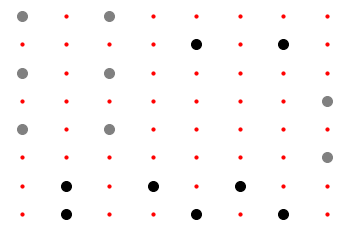

In [16]:
f, ax = plt.subplots(1, 1)
for i in instance.i:
    for j in instance.j:
        X=value(instance.U[i,j])
        Y=value(instance.B[i,j])      
        if   X==1:
            plt.scatter( i,j,s=100,color='black')
        elif Y==1:
            plt.scatter( i,j,s=100,color='grey')
        else:
            plt.scatter( i,j,s=10,color='red')
plt.axis('off')
plt.show()

4 6 done


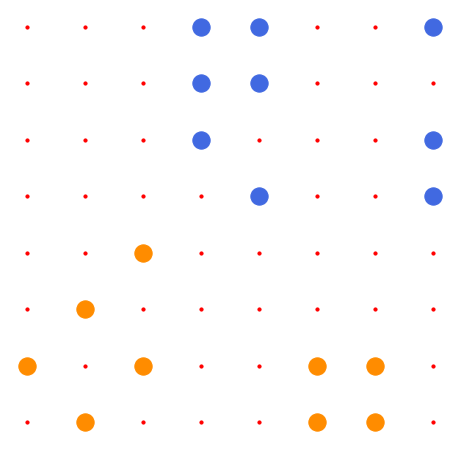

7 5 done


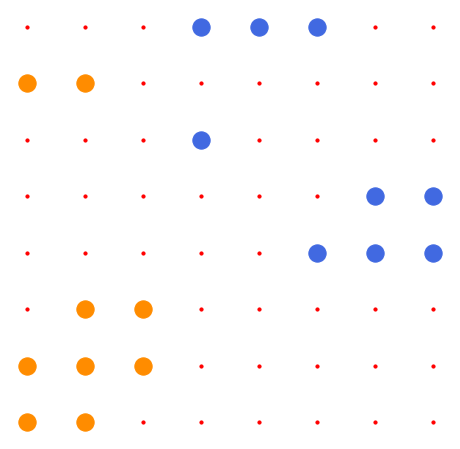

In [27]:
for w in range(2):
    plt.figure(figsize=(8,8))

    for i in instance.i:
        for j in instance.j:
            instance.U[i,j].unfix()
            if random.uniform(0, 1) <0.03:
                instance.U[i,j].fix(1)
                print(i,j,'done')
            #instance.B[i,j].fix(1)
    results = opt.solve(instance) # solves and updates instance
    '''print(value(instance.obj) )
    if (results.solver.status == SolverStatus.ok) and (results.solver.termination_condition == TerminationCondition.optimal):
        print('feasible')
    elif (results.solver.termination_condition == TerminationCondition.infeasible):
        print('infeasible')
    else:
        print ('Solver Status:',  results.solver.status)'''
    #f, ax = plt.subplots(1, 1)
    for i in instance.i:
        for j in instance.j:
            X=value(instance.U[i,j])
            Y=value(instance.B[i,j])      
            if   X==1:
                plt.scatter( i,j,s=300,color='royalblue')
            elif Y==1:
                plt.scatter( i,j,s=300,color='darkorange')
            else:
                plt.scatter( i,j,s=10,color='red')
    plt.axis('off')
    plt.show()



feasible


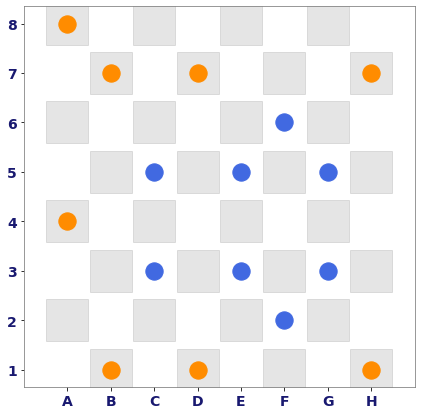

feasible


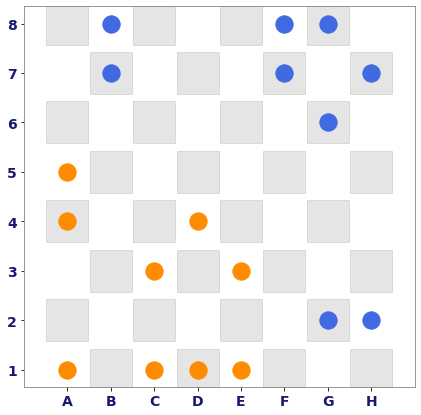

feasible


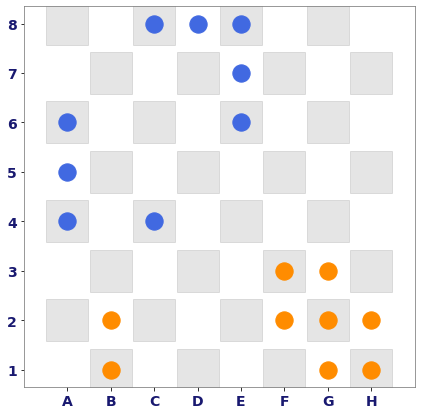

feasible


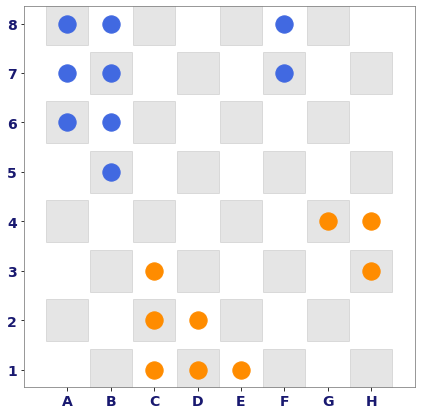

feasible


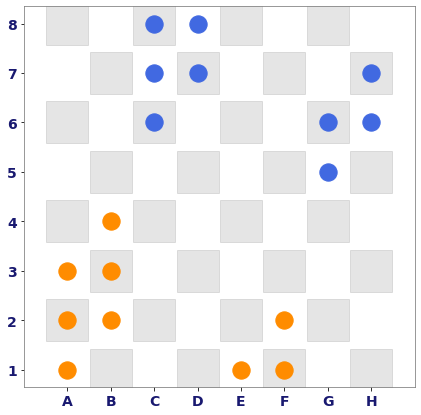

feasible


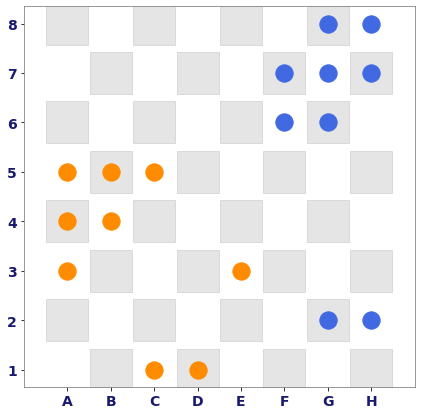

feasible


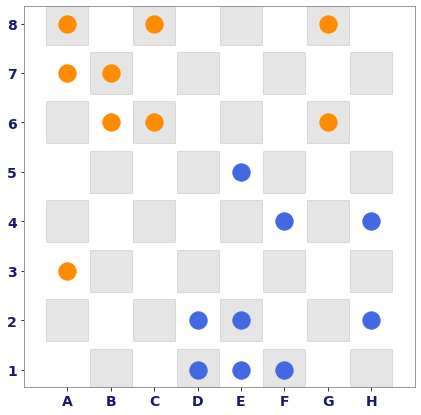

feasible


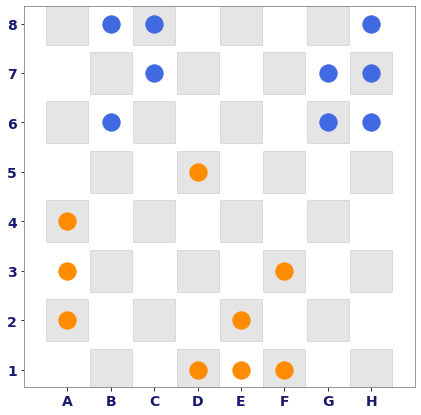

feasible


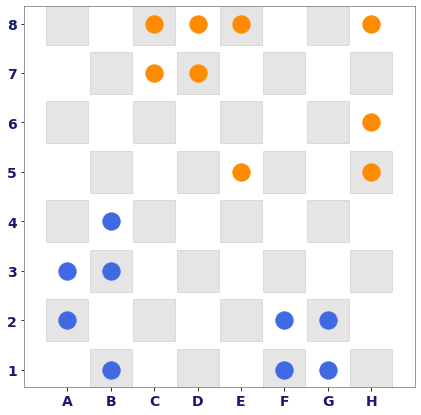

feasible


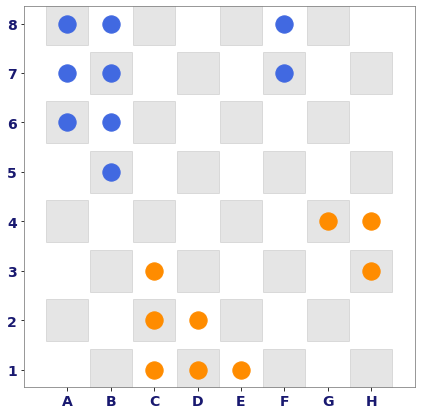

feasible


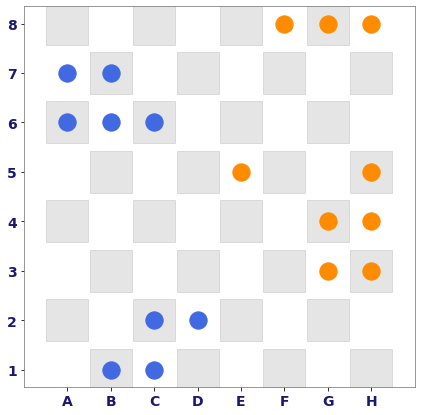

feasible


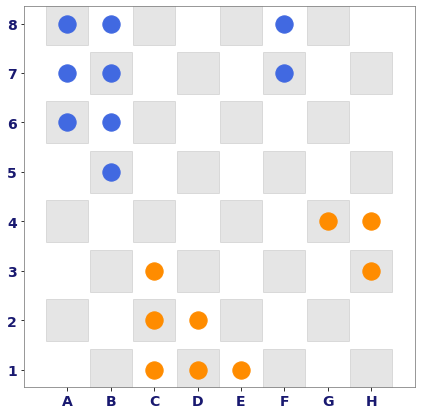

feasible


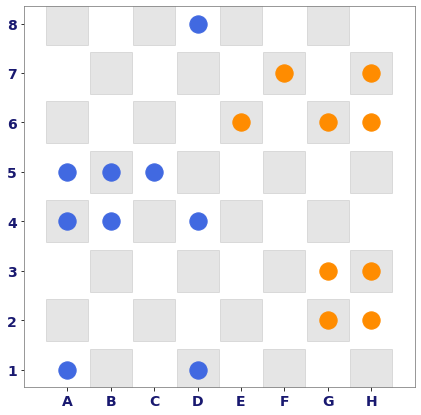

feasible


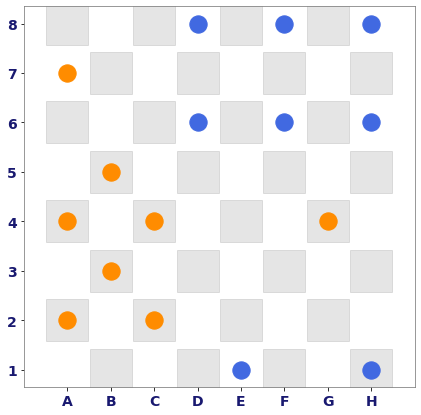

feasible


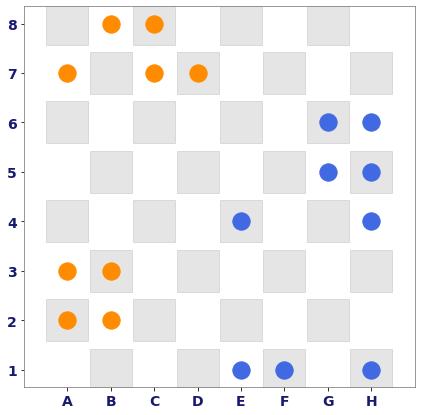

feasible


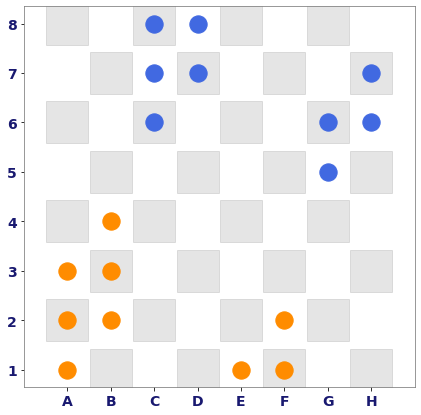

feasible


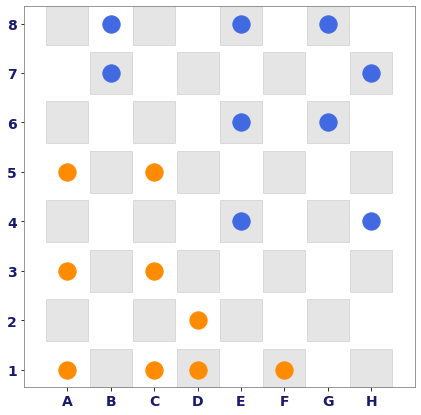

feasible


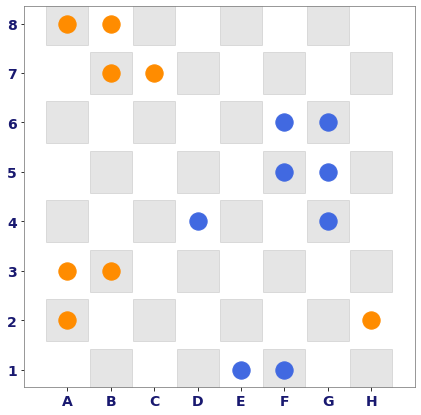

feasible


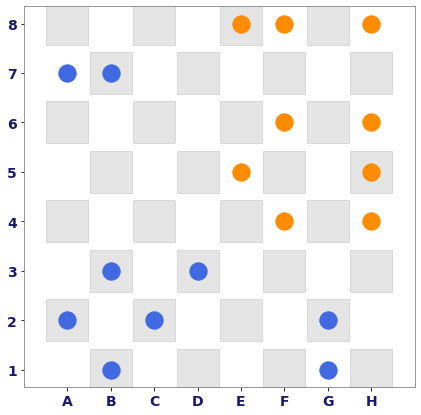

feasible


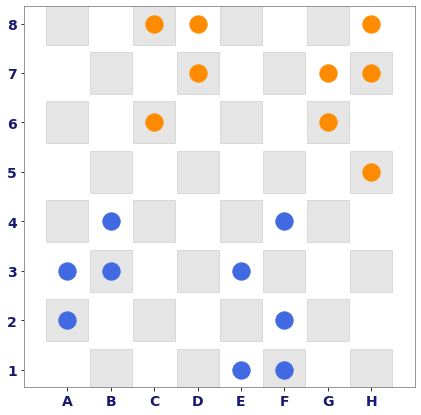

In [34]:
#instance.U[4,5].fix(1)
x=['A','B','C','D','E','F','G','H']
y=['1','2','3','4','5','6','7','8']
#f, ax = plt.subplots(1, 1)


for iter in range(20):
    fig=plt.figure(figsize=(7,7))
    plt.rc('axes',edgecolor='grey')
    #instance = model.create_instance()
    for i in instance.i:
        for j in instance.j:
            instance.U[i,j].unfix()
            if random.uniform(0, 1) <0.03:
                instance.U[i,j].fix(1)
                
    results = opt.solve(instance) 
    for i in instance.i:
        for j in instance.j:
            if (i+j) % 2==1:
                plt.scatter( i,j,s=1700,marker='s',color='black',alpha=0.1)
            else:
                plt.scatter( i,j,s=1000,marker='s',color='w',alpha=1)
            X=value(instance.U[i,j])
            Y=value(instance.B[i,j])      
            if   X==1:
                plt.scatter( i,j,s=300,color='royalblue')
            elif Y==1:
                plt.scatter( i,j,s=300,color='darkorange')

                
            '''else:
                plt.scatter( i,j,s=10,color='red')'''
    plt.xticks(range(1,9),x,fontsize=14,c='midnightblue',fontweight='bold')
    plt.yticks(range(1,9),fontsize=14,c='midnightblue',fontweight='bold')
    #plt.axis('off')
    if (results.solver.status == SolverStatus.ok) and (results.solver.termination_condition == TerminationCondition.optimal):
        print('feasible')
    elif (results.solver.termination_condition == TerminationCondition.infeasible):
        print('infeasible')
    else:
        print ('Solver Status:',  results.solver.status)
    #plt.show()
    plt.xlim(0,9)
    plt.savefig('Queen Army' + str(iter)+ '.png', format='png', dpi=200)
    plt.show()
